<a href="https://colab.research.google.com/github/Karlajack/MachineLearning2_Advance/blob/main/Week2_clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation: Clustering**

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [51]:
#Load the data
df = pd.read_csv('/content/marketing_campaign.csv',sep='\\t',engine='python')
df.head(5)

,"""ID",Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,"Response"""
0,"""5524",1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,"1"""
1,"""2174",1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,"0"""
2,"""4141",1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,"0"""
3,"""6182",1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,"0"""
4,"""5324",1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,"0"""


In [78]:
# renaming ID and Response column
df.rename(columns = {'"ID':'ID'}, inplace = True)
df.rename(columns = {'Response"':'Response'}, inplace = True)



In [79]:
# Removing prefix(") from Id and Response data
df['ID'] = df['ID'].str.replace('\W', '', regex=True)
df['Response'] = df['Response'].replace('\W', '', regex=True).fillna(0).astype(int)



In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## DATA CLEANING

In [81]:
#Missing values for the income
#To drop the NA values
df = df.dropna()



In [82]:
# convering the Dt_customer to date type
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')

In [83]:
# date for recent purchase by customer
max(df.Dt_Customer)

Timestamp('2014-06-29 00:00:00')

In [84]:
#number of days a customer is registered in the database relative to the recent customer
df['customer_no_of_days']=max(df.Dt_Customer)-df.Dt_Customer
df["customer_no_of_days"] = df["customer_no_of_days"].dt.days


In [85]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_no_of_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   object        
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [46]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

# Feature Engineering

In [86]:
#Age of custome
df["Age"] = 2024-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving by marital status by "Partner" and "Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Dropping some of features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [89]:
df.head(2)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,customer_no_of_days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,70,27,Alone,2,3,1


In [92]:
#categorical columns encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])
df["Living_With"] = le.fit_transform(df["Living_With"])
#df = pd.get_dummies(df, columns=["Education", "Living_With"])



In [93]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
data = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [97]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data= scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)



,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,customer_no_of_days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,2.504712,-0.554143,0.693232,1.529129,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.571082,-1.169518,-0.131574,-1.188411,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.229327,1.291982,-0.543978,-0.205155,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.912837,-0.554143,0.280829,-1.059945,-1.266777,-0.919224,0.741384,0.070501,0.450009,0.632356
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.112428,0.061232,-0.131574,-0.951244,-1.016420,-0.307044,0.741384,0.070501,0.450009,0.632356


# DIMENSIONALITY REDUCTION

In [104]:
#PCA to reduce dimensions to 3 features
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)
PCA_df = pd.DataFrame(data=x_pca, columns=(["pcol1","pcol2", "pcol3"]))
PCA_df.head(2)

,pcol1,pcol2,pcol3
0,5.019430,-0.083537,2.411356
1,-2.894198,-0.052901,-1.483215


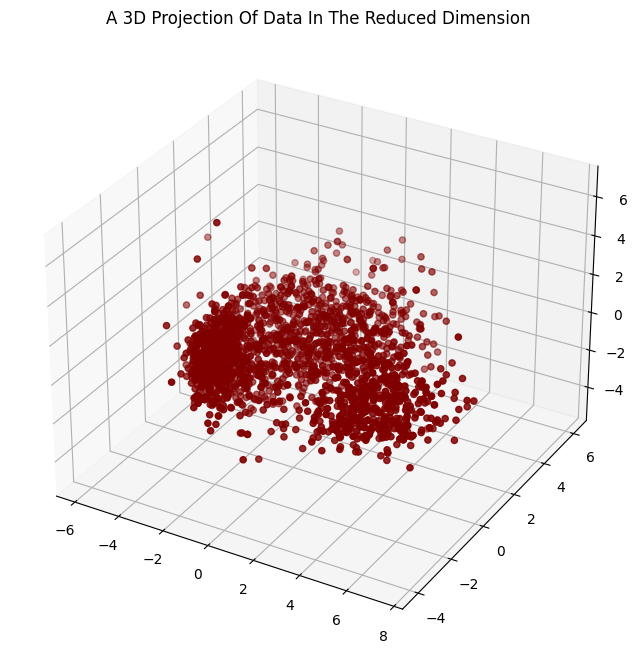

In [105]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["pcol1"]
y =PCA_df["pcol2"]
z =PCA_df["pcol3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLUSTERING

###Kmean clustering

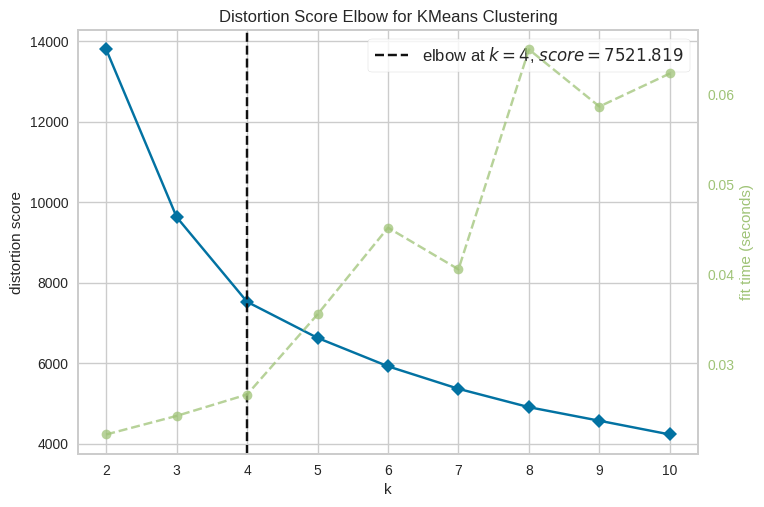

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
# Using Elbow Method to determine the number of clusters to be formed
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [110]:
# Kmeans clustering
k=4
kmeans = KMeans(n_clusters=k, random_state=0).fit(PCA_df)

In [115]:
# Print the results
print("Clusters centers:", kmeans.cluster_centers_)
print("Labels for each point: ", kmeans.labels_)

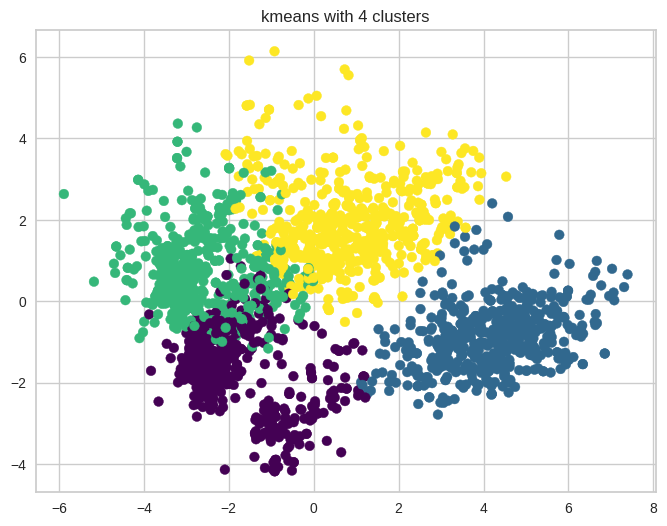

In [119]:
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(PCA_df.iloc[:, 0], PCA_df.iloc[:, 1], c=kmeans.labels_ , cmap='viridis')
plt.title(f'kmeans with {k} clusters')
plt.show()

###AgglomerativeClustering


In [116]:
#Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC


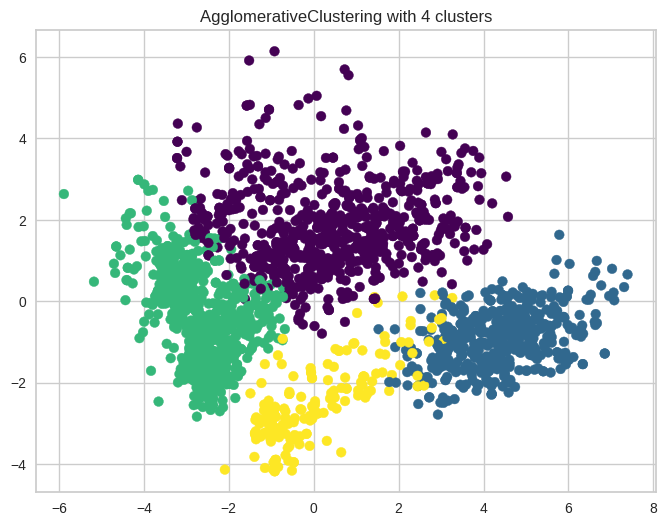

In [118]:
#plot
plt.figure(figsize=(8,6))
plt.scatter(PCA_df.iloc[:, 0], PCA_df.iloc[:, 1], c=PCA_df["Clusters"], cmap='viridis')
plt.title(f'AgglomerativeClustering with {k} clusters')
plt.show()

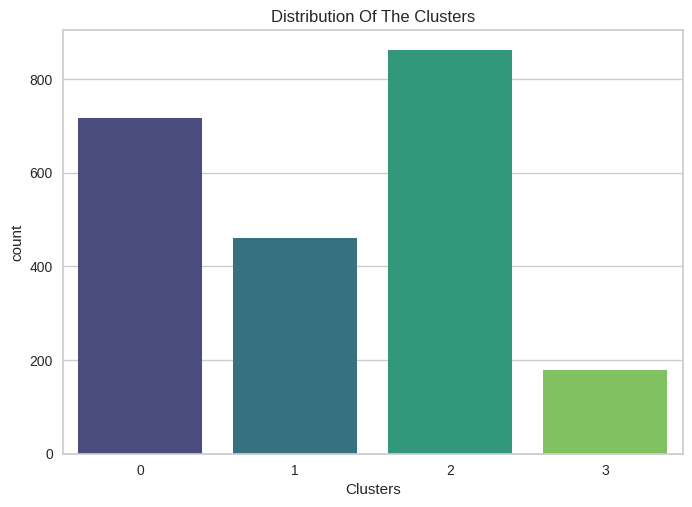

In [129]:
#Plotting countplot of clusters
pal = "viridis"
pl = sns.countplot(x=PCA_df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

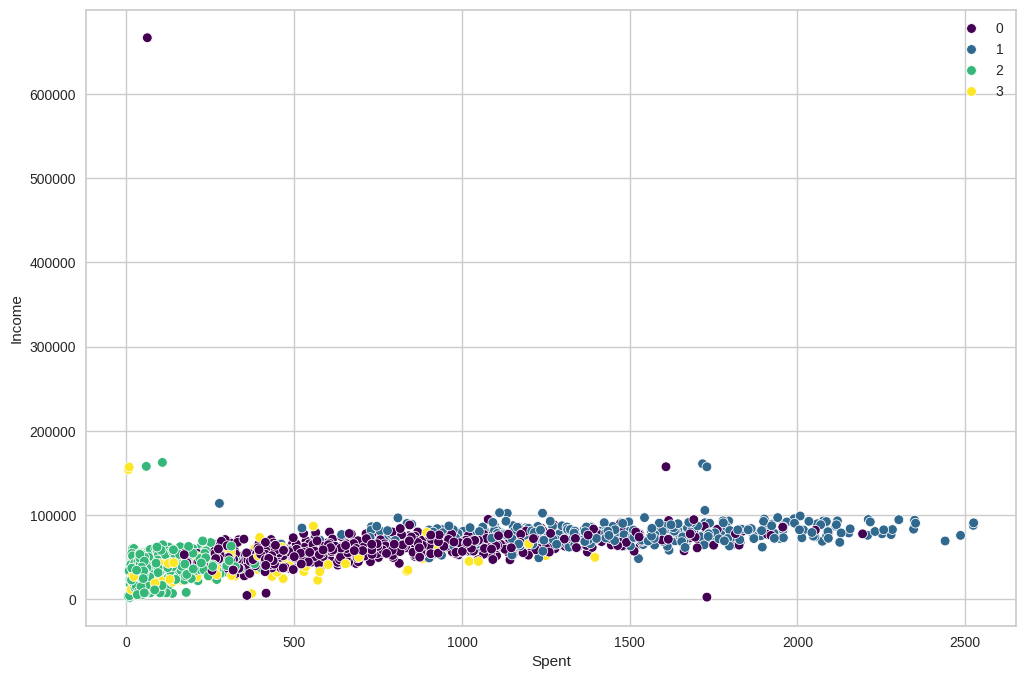

In [135]:
#Cluster's Profile Based On Income And Spending
####Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC
####plotting
plt.figure(figsize=(12,8))
sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()